# Bogo Sort (Permutation Sort)

## Introducción

*Bogo Sort* (también conocido como *permutation sort*) es un algoritmo para ordenamiento de números. Está basado en el paradigma **prueba y error**. Esto significa que, dada una lista de números desordenados, el algoritmo generará una **permutación** aleatoria de la lista esperando obtener la lista ordenada.

Entre todos los algoritmos de ordenamiento de números, **Bogo Sort** es uno de los más lentos.

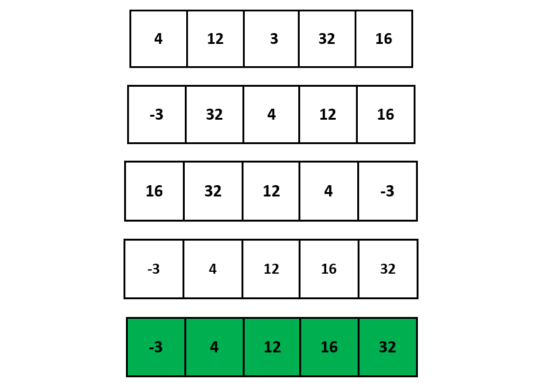

## Código

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)

In [ ]:
import random

def bogosort(nums):
    def isSorted(nums):
        if len(nums) < 2:
            return True
        for i in range(len(nums) - 1):
            if nums[i] > nums[i + 1]:
                return False
        return True

    while not isSorted(nums):
        random.shuffle(nums)
    return nums

In [ ]:
libreria.bogosort(lista)

## Probando el código

Probemos para una lista de dos elementos.

In [ ]:
lista = [2,1]
bogosort(lista)
print("La lista ordenada es:")
for i in range(len(lista)):
    print(f"{lista[i]}")

La lista ordenada es:
1
2


## Listas de diferente tamaño

Midamos el tiempo que tarda con listas de diferente tamaño.

In [ ]:
print("N\tLista")
for n_elem in range(2, 11):
    np.random.seed(2)
    lista = np.random.randint(1, 100, n_elem)
    print(f"{n_elem}\t{lista}")

N	Lista
2	[41 16]
3	[41 16 73]
4	[41 16 73 23]
5	[41 16 73 23 44]
6	[41 16 73 23 44 83]
7	[41 16 73 23 44 83 76]
8	[41 16 73 23 44 83 76  8]
9	[41 16 73 23 44 83 76  8 35]
10	[41 16 73 23 44 83 76  8 35 50]


In [ ]:
tiempos = []
for i in range(10):
    np.random.seed(2)
    time1 = time.time()
    lista2 = np.random.randint(1, 100, 2)
    bogosort(lista2)
    tiempos.append(time.time()-time1)
print(f"{np.mean(tiempos)}+-{np.std(tiempos)}")

0.00011813640594482422+-0.00028219916857117824


In [ ]:
tiempos_totales = []
std_totales = []
print("n\tt\tstd")
for n_elem in range(2, 11):
    tiempos = []
    for i in range(10):
        np.random.seed(2)
        time1 = time.time()
        lista = np.random.randint(1, 100, n_elem)
        # print(lista)
        bogosort(lista)
        # print(lista)
        tiempos.append(time.time()-time1)
    tiempos_totales.append(np.mean(tiempos))
    std_totales.append(np.std(tiempos))
    print(f"{n_elem}\t{np.mean(tiempos)}\t{np.std(tiempos)}")

n	t	std
2	3.1781196594238284e-05	2.4902372620983077e-05
3	4.677772521972656e-05	1.876607160472046e-05
4	9.784698486328124e-05	7.199113643872049e-05
5	0.0009293556213378906	0.0007373142724122699
6	0.002697253227233887	0.0018580860577525273
7	0.023740148544311522	0.018594217665426592
8	0.17600977420806885	0.1673954393781612
9	1.6214158058166503	1.5512371821840794
10	19.510009860992433	13.235851922002777


Text(0, 0.5, 'Tiempo [s]')

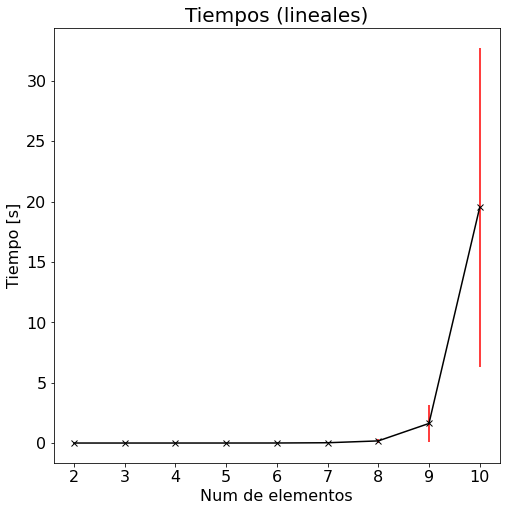

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(range(2, 11), tiempos_totales, yerr=std_totales, marker='x', c='k', ecolor='r')
ax.set_title("Tiempos (lineales)", fontsize=20)
ax.set_xlabel("Num de elementos")
ax.set_ylabel("Tiempo [s]")

Text(0, 0.5, 'Tiempo [s]')

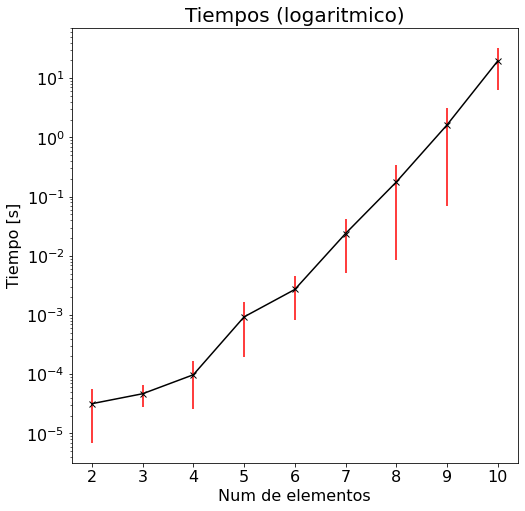

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(range(2, 11), tiempos_totales, yerr=std_totales, marker='x', c='k', ecolor='r')
ax.set_yscale('log', nonposy='clip')
ax.set_title("Tiempos (logaritmico)", fontsize=20)
ax.set_xlabel("Num de elementos")
ax.set_ylabel("Tiempo [s]")

Comparemos con el método de ordenamiento que trae por defecto python.

In [ ]:
tiempos_totales_py = []
std_totales_py = []
print("n\tt\tstd")
for n_elem in range(2, 11):
    tiempos = []
    for i in range(10):
        np.random.seed(2)
        time1 = time.time()
        lista = np.random.randint(1, 100, n_elem)
        # print(lista)
        lista.sort()
        # print(lista)
        tiempos.append(time.time()-time1)
    tiempos_totales_py.append(np.mean(tiempos))
    std_totales_py.append(np.std(tiempos))
    print(f"{n_elem}\t{np.mean(tiempos)}\t{np.std(tiempos)}")

n	t	std
2	2.32696533203125e-05	2.452589105663288e-05
3	1.800060272216797e-05	7.635538786136034e-06
4	1.7881393432617188e-05	6.197965994270544e-06
5	2.033710479736328e-05	7.75505677535139e-06
6	2.1982192993164063e-05	8.160605112402404e-06
7	1.652240753173828e-05	6.821480126310275e-06
8	1.5401840209960936e-05	6.422449568673679e-06
9	1.5211105346679687e-05	5.585104702157069e-06
10	1.8358230590820312e-05	9.350751140507104e-06


Text(0, 0.5, 'Tiempo [s]')

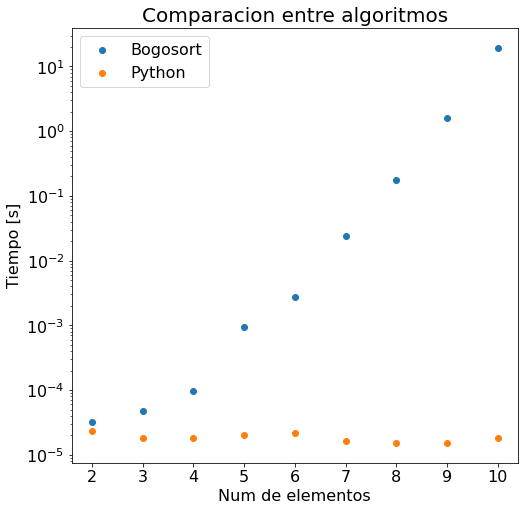

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(range(2,11), tiempos_totales, label='Bogosort')
ax.scatter(range(2,11), tiempos_totales_py, label='Python')
ax.set_yscale('log', nonposy='clip')
ax.legend(fontsize=16)
ax.set_title("Comparacion entre algoritmos",fontsize=20)
ax.set_xlabel("Num de elementos")
ax.set_ylabel("Tiempo [s]")

## Probemos distintos tipos de listas desordenadas

In [ ]:
lista_ord = [8, 16, 23, 35, 41, 44, 73, 76, 83]
lista_rnd = [41, 16, 73, 23, 44, 83, 76, 8, 35]
lista_rev = [83, 76, 73, 44, 41, 35, 23, 16, 8]
lista_one = [83, 8, 16, 23, 35, 41, 44, 73, 76]
lista_unq = [41, 16, 73, 23, 41, 16, 41, 16, 23]
listas_bib = {'rnd':lista_rnd, 'rev':lista_rev, 'one':lista_one, 'unique':lista_unq}

In [ ]:
tiempos_totales_tests = []
std_totales_tests = []
print("Type\tt\tstd")
for key in listas_bib.keys():
    tiempos = []
    for i in range(10):
        np.random.seed(2)
        time1 = time.time()
        lista = listas_bib[key].copy()
        # print(lista)
        bogosort(lista)
        # print(lista)
        tiempos.append(time.time()-time1)
    tiempos_totales_tests.append(np.mean(tiempos))
    std_totales_tests.append(np.std(tiempos))
    print(f"{key}\t{np.mean(tiempos)}\t{np.std(tiempos)}")

Type	t	std
rnd	0.9212886333465576	0.6313954171100182
rev	1.8140833616256713	1.0760522006128235
one	0.9726942777633667	1.1349695787862142
unique	0.015621232986450195	0.01505817191154515


De una vez comparemos con el método de python

In [ ]:
tiempos_totales_tests_py = []
std_totales_tests_py = []
print("Type\tt\tstd")
for key in listas_bib.keys():
    tiempos = []
    for i in range(10):
        np.random.seed(2)
        time1 = time.time()
        lista = listas_bib[key].copy()
        # print(lista)
        lista.sort()
        # print(lista)
        tiempos.append(time.time()-time1)
    tiempos_totales_tests_py.append(np.mean(tiempos))
    std_totales_tests_py.append(np.std(tiempos))
    print(f"{key}\t{np.mean(tiempos)}\t{np.std(tiempos)}")

Type	t	std
rnd	1.1205673217773438e-06	1.0823783362213295e-06
rev	8.344650268554688e-07	5.250624548326788e-07
one	9.775161743164062e-07	6.437301635742187e-07
unique	9.5367431640625e-07	5.642013342952362e-07


Text(0, 0.5, 'Tiempo [s]')

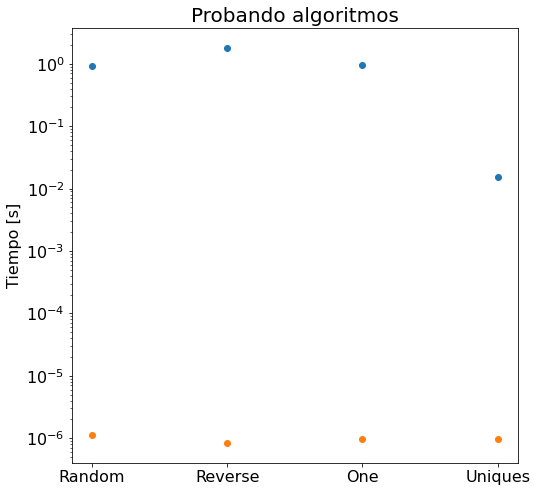

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(range(4), tiempos_totales_tests, label='Bogosort')
ax.scatter(range(4), tiempos_totales_tests_py, label='Python')
ax.set_yscale('log', nonposy='clip')
ax.set_xticks(range(4))
ax.set_xticklabels(['Random', 'Reverse', 'One', 'Uniques'])
ax.set_title("Probando algoritmos", fontsize=20)
ax.set_ylabel("Tiempo [s]")

## Conclusiones



*   El algoritmo **bogosort** es uno de los más lentos para el ordenamiento de números.
*   El algoritmo depende del tipo de lista a ordenar, siendo algunos casos favorables para el procedimiento.
*   El algoritmo depende del número a elementos a ordenar.
*   La simpleza de este algoritmo hace que sea fácil de implementar pero no es eficiente.

